Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [2]:
library('nycflights13')
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
flights %>% head(5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [9]:
flights$carrier %>% head

[1] "UA" "UA" "AA" "B6" "DL" "UA"

In [10]:
airlines %>% print

# A tibble: 16 x 2
   carrier name                       
   <chr>   <chr>                      
 1 9E      Endeavor Air Inc.          
 2 AA      American Airlines Inc.     
 3 AS      Alaska Airlines Inc.       
 4 B6      JetBlue Airways            
 5 DL      Delta Air Lines Inc.       
 6 EV      ExpressJet Airlines Inc.   
 7 F9      Frontier Airlines Inc.     
 8 FL      AirTran Airways Corporation
 9 HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air                  
11 OO      SkyWest Airlines Inc.      
12 UA      United Air Lines Inc.      
13 US      US Airways Inc.            
14 VX      Virgin America             
15 WN      Southwest Airlines Co.     
16 YV      Mesa Airlines Inc.         


In [12]:
flights %>%
    select(carrier) %>%
    left_join(airlines) %>%
    group_by(name) %>%
    count() %>%
    arrange(desc(n))

Joining, by = "carrier"



name,n
<chr>,<int>
United Air Lines Inc.,58665
JetBlue Airways,54635
ExpressJet Airlines Inc.,54173
Delta Air Lines Inc.,48110
American Airlines Inc.,32729
Envoy Air,26397
US Airways Inc.,20536
Endeavor Air Inc.,18460
Southwest Airlines Co.,12275


In [18]:
df = flights %>% left_join(airlines) %>% mutate(name=fct_infreq(name) %>% fct_lump(n=10) %>% fct_rev())

Joining, by = "carrier"



Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

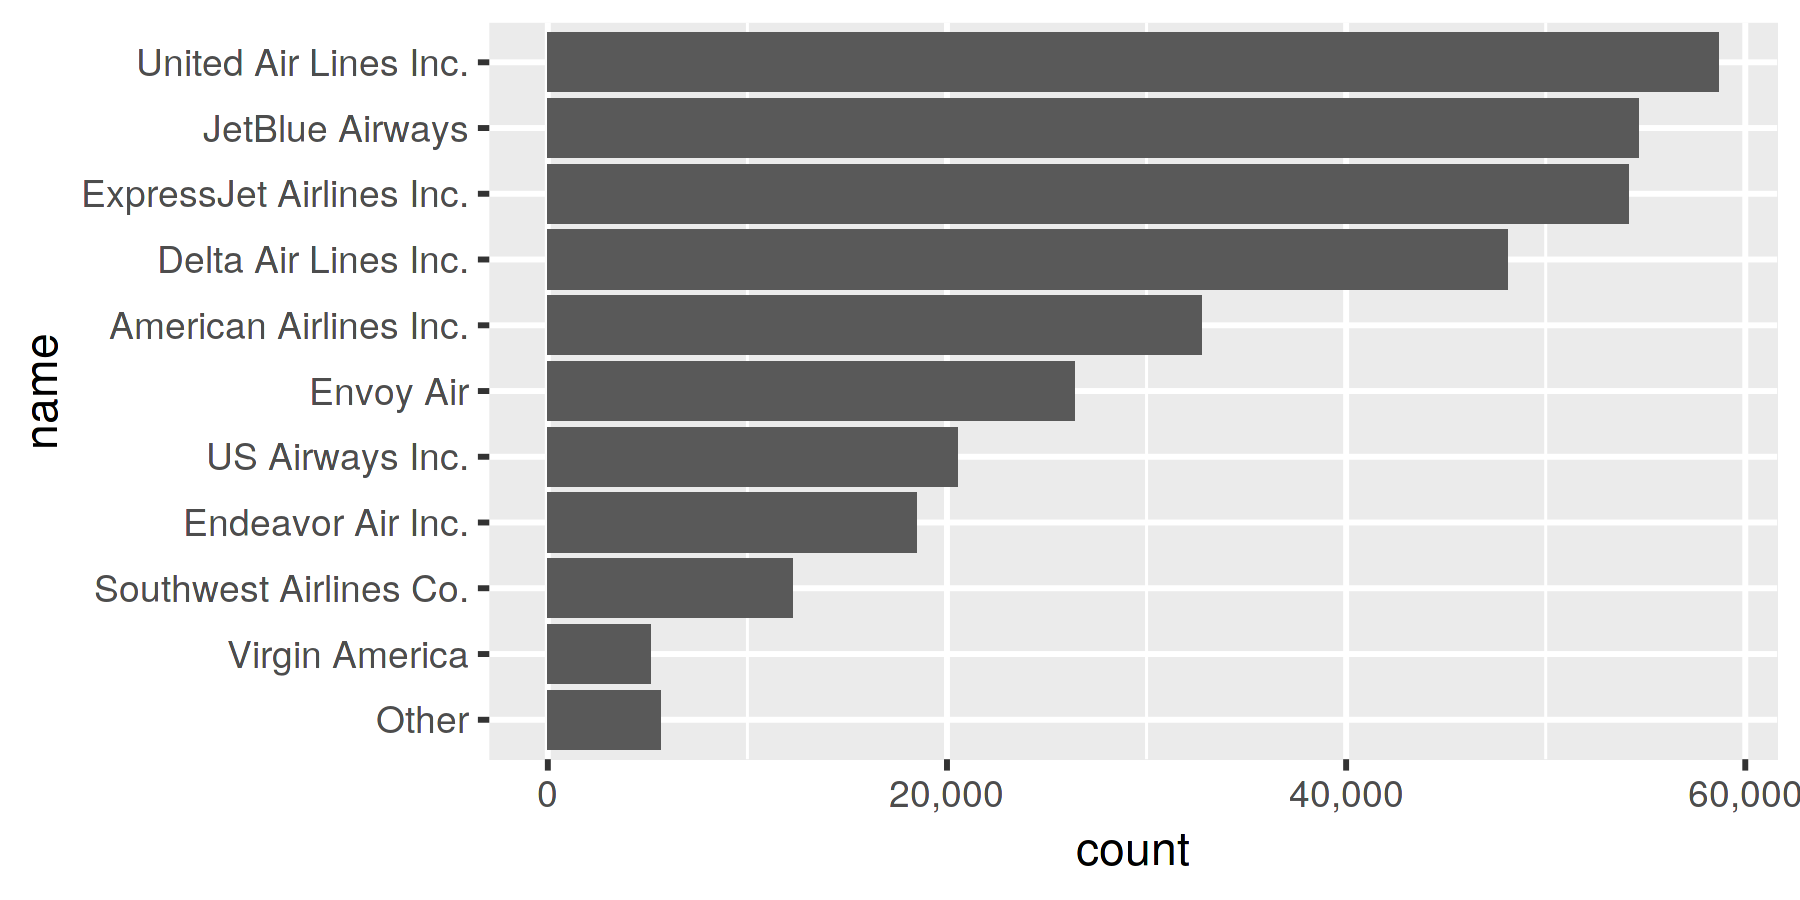

In [19]:
options(repr.plot.width=6, repr.plot.height=3, repr.plot.res=300)
p = ggplot(df, aes(x=name))
p = p + geom_bar()
p = p + coord_flip()
p = p + scale_y_continuous(labels = scales::comma)
p